In [ ]:
from google.colab import drive; drive.mount('/content/drive')

In [41]:
#import pandas
import pandas as pd
#load datasets from TidyTuesdays and put them each in different variables
life_expectancy=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-12-05/life_expectancy.csv')
life_expectancy_different_ages=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-12-05/life_expectancy_different_ages.csv')
life_expectancy_female_male=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-12-05/life_expectancy_female_male.csv')
#display all datasets
display(life_expectancy,life_expectancy_different_ages,life_expectancy_female_male)
display(life_expectancy.info(),life_expectancy_different_ages.info(),life_expectancy_female_male.info())


,Entity,Code,Year,LifeExpectancy
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258
...,...,...,...,...
20750,Zimbabwe,ZWE,2017,60.7095
20751,Zimbabwe,ZWE,2018,61.4141
20752,Zimbabwe,ZWE,2019,61.2925
20753,Zimbabwe,ZWE,2020,61.1242


,Entity,Code,Year,LifeExpectancy0,LifeExpectancy10,LifeExpectancy25,LifeExpectancy45,LifeExpectancy65,LifeExpectancy80
0,Afghanistan,AFG,1950,27.7275,49.1459,54.442200,63.422500,73.4901,83.7259
1,Afghanistan,AFG,1951,27.9634,49.2941,54.564400,63.500603,73.5289,83.7448
2,Afghanistan,AFG,1952,28.4456,49.5822,54.799800,63.647600,73.6018,83.7796
3,Afghanistan,AFG,1953,28.9304,49.8634,55.028603,63.788902,73.6706,83.8118
4,Afghanistan,AFG,1954,29.2258,49.9306,55.116500,63.848100,73.7041,83.8334
...,...,...,...,...,...,...,...,...,...
20750,Zimbabwe,ZWE,2017,60.7095,64.6277,66.110596,71.014100,78.5895,86.8135
20751,Zimbabwe,ZWE,2018,61.4141,65.1821,66.604500,71.267200,78.6681,86.8399
20752,Zimbabwe,ZWE,2019,61.2925,65.0582,66.491600,71.203400,78.6739,86.8614
20753,Zimbabwe,ZWE,2020,61.1242,64.8006,66.086900,70.519104,78.0986,86.5717


,Entity,Code,Year,LifeExpectancyDiffFM
0,Afghanistan,AFG,1950,1.261900
1,Afghanistan,AFG,1951,1.270601
2,Afghanistan,AFG,1952,1.288300
3,Afghanistan,AFG,1953,1.306601
4,Afghanistan,AFG,1954,1.276501
...,...,...,...,...
19917,Zimbabwe,ZWE,2017,4.748299
19918,Zimbabwe,ZWE,2018,4.625503
19919,Zimbabwe,ZWE,2019,5.017799
19920,Zimbabwe,ZWE,2020,5.732201


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20755 entries, 0 to 20754
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Entity          20755 non-null  object 
 1   Code            19061 non-null  object 
 2   Year            20755 non-null  int64  
 3   LifeExpectancy  20755 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 648.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20755 entries, 0 to 20754
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            20755 non-null  object 
 1   Code              19061 non-null  object 
 2   Year              20755 non-null  int64  
 3   LifeExpectancy0   20755 non-null  float64
 4   LifeExpectancy10  19922 non-null  float64
 5   LifeExpectancy25  19922 non-null  float64
 6   LifeExpectancy45  19922 non-null  float64
 7   LifeExpectancy65  1992

None

None

None

In [4]:
#check if there are missing data in each dataset
missing_life_expectancy=life_expectancy['LifeExpectancy'].isna().sum()
missing_life_expectancy_different_ages=life_expectancy_different_ages[['LifeExpectancy0',	'LifeExpectancy10',	'LifeExpectancy25',	'LifeExpectancy45',	'LifeExpectancy65',	'LifeExpectancy80']].isna().sum()
missing_life_expectancy_life_expectancy_female_male=life_expectancy_female_male['LifeExpectancyDiffFM'].isna().sum()

print(missing_life_expectancy, missing_life_expectancy_different_ages,missing_life_expectancy_life_expectancy_female_male)

0 LifeExpectancy0       0
LifeExpectancy10    833
LifeExpectancy25    833
LifeExpectancy45    833
LifeExpectancy65    833
LifeExpectancy80    833
dtype: int64 0


In [5]:
#export dataframe to csv file for thorough inspection
life_expectancy_different_ages.to_csv('life_expectancy_different_ages.csv',index=True)


In [6]:
#drop rows that have missing data, rows that has missing data are mostly data before the year 1950 and life expectancy data of continents
life_expectancy_ages_clean=life_expectancy_different_ages.dropna()
missing_life_expectancy_ages_clean=life_expectancy_ages_clean[['LifeExpectancy0',	'LifeExpectancy10',	'LifeExpectancy25',	'LifeExpectancy45',	'LifeExpectancy65',	'LifeExpectancy80']].isna().sum()
print(missing_life_expectancy_ages_clean)
display(life_expectancy_ages_clean)

LifeExpectancy0     0
LifeExpectancy10    0
LifeExpectancy25    0
LifeExpectancy45    0
LifeExpectancy65    0
LifeExpectancy80    0
dtype: int64


,Entity,Code,Year,LifeExpectancy0,LifeExpectancy10,LifeExpectancy25,LifeExpectancy45,LifeExpectancy65,LifeExpectancy80
0,Afghanistan,AFG,1950,27.7275,49.1459,54.442200,63.422500,73.4901,83.7259
1,Afghanistan,AFG,1951,27.9634,49.2941,54.564400,63.500603,73.5289,83.7448
2,Afghanistan,AFG,1952,28.4456,49.5822,54.799800,63.647600,73.6018,83.7796
3,Afghanistan,AFG,1953,28.9304,49.8634,55.028603,63.788902,73.6706,83.8118
4,Afghanistan,AFG,1954,29.2258,49.9306,55.116500,63.848100,73.7041,83.8334
...,...,...,...,...,...,...,...,...,...
20750,Zimbabwe,ZWE,2017,60.7095,64.6277,66.110596,71.014100,78.5895,86.8135
20751,Zimbabwe,ZWE,2018,61.4141,65.1821,66.604500,71.267200,78.6681,86.8399
20752,Zimbabwe,ZWE,2019,61.2925,65.0582,66.491600,71.203400,78.6739,86.8614
20753,Zimbabwe,ZWE,2020,61.1242,64.8006,66.086900,70.519104,78.0986,86.5717


,Entity,Year,LifeExpectancy
Code,,,
OWID_WRL,World,1770,28.5000
OWID_WRL,World,1800,28.5000
OWID_WRL,World,1820,29.0000
OWID_WRL,World,1850,29.3000
OWID_WRL,World,1870,29.7000
...,...,...,...
OWID_WRL,World,2017,72.3267
OWID_WRL,World,2018,72.5759
OWID_WRL,World,2019,72.7897


<Axes: title={'center': 'World'}, xlabel='Year', ylabel='Life Expectancy'>

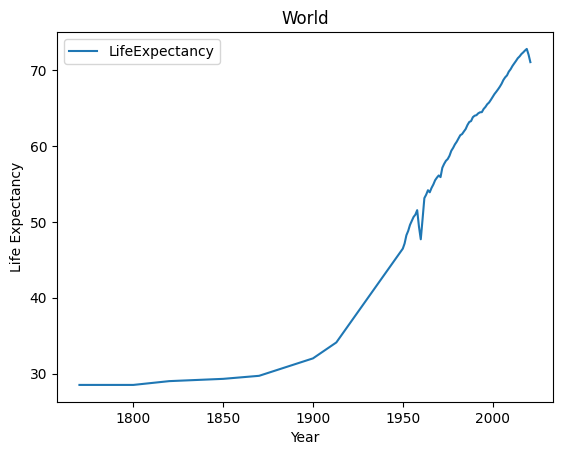

In [7]:
#selecting rows for world life expectancy data
world_le=life_expectancy.set_index('Code')
#sorting rows of data based on year in ascending manner,
#because data before the year 1950 is placed at the end
world_le=world_le.loc['OWID_WRL'].sort_values(by='Year',ascending=True)
display(world_le)

#generating a line graph of world life expectancy
world_le.plot(x='Year',y=['LifeExpectancy'], title='World', ylabel='Life Expectancy')

,Entity,Year,LifeExpectancy0,LifeExpectancy10,LifeExpectancy25,LifeExpectancy45,LifeExpectancy65,LifeExpectancy80
Code,,,,,,,,
OWID_WRL,World,1950,46.4643,61.1572,64.309296,69.295800,76.2965,85.0199
OWID_WRL,World,1951,47.1440,61.6418,64.674500,69.456200,76.3369,85.0145
OWID_WRL,World,1952,48.2311,62.4193,65.298800,69.831696,76.5593,85.1412
OWID_WRL,World,1953,48.8024,62.7906,65.600000,70.021400,76.6337,85.1490
OWID_WRL,World,1954,49.5919,63.2983,66.018700,70.314700,76.8152,85.2582
...,...,...,...,...,...,...,...,...
OWID_WRL,World,2017,72.3267,75.6813,76.634000,78.431100,82.2408,88.1961
OWID_WRL,World,2018,72.5759,75.8762,76.815100,78.592896,82.3625,88.2849
OWID_WRL,World,2019,72.7897,76.0304,76.957100,78.721200,82.4591,88.3608


<Axes: title={'center': 'World'}, xlabel='Year', ylabel='Life Expectancy'>

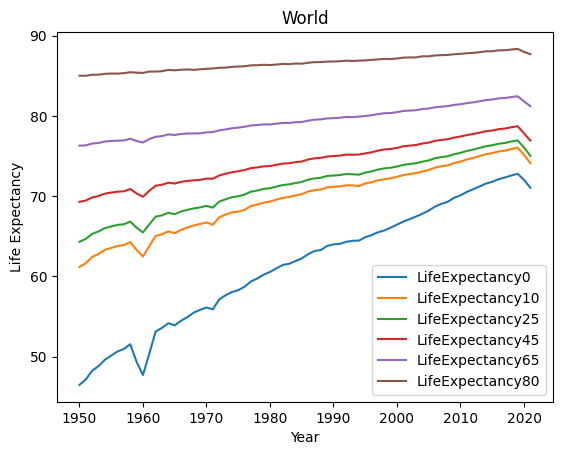

In [8]:

#selecting rows for world life expectancy in different ages
world_le_age=life_expectancy_different_ages.set_index('Code')
world_le_age=world_le_age.loc['OWID_WRL']
#select starting year 1950 because there is no data prior to that for columns age 10 to 80
world_le_age_1950=world_le_age[world_le_age['Year']>=1950]
display(world_le_age_1950)
#generate line plot
world_le_age_1950.plot(x='Year',y=(['LifeExpectancy0','LifeExpectancy10','LifeExpectancy25','LifeExpectancy45','LifeExpectancy65','LifeExpectancy80']), title='World', ylabel='Life Expectancy')

,Entity,Code,Year,LifeExpectancy,LifeExpectancyDiffFM
0,Afghanistan,AFG,1950,27.7275,1.261900
1,Afghanistan,AFG,1951,27.9634,1.270601
2,Afghanistan,AFG,1952,28.4456,1.288300
3,Afghanistan,AFG,1953,28.9304,1.306601
4,Afghanistan,AFG,1954,29.2258,1.276501
...,...,...,...,...,...
19485,Zimbabwe,ZWE,2017,60.7095,4.748299
19486,Zimbabwe,ZWE,2018,61.4141,4.625503
19487,Zimbabwe,ZWE,2019,61.2925,5.017799
19488,Zimbabwe,ZWE,2020,61.1242,5.732201


,Entity,Year,LifeExpectancy,LifeExpectancyDiffFM
Code,,,,
OWID_WRL,World,1950,46.4643,3.846500
OWID_WRL,World,1951,47.1440,3.562901
OWID_WRL,World,1952,48.2311,3.266701
OWID_WRL,World,1953,48.8024,3.166802
OWID_WRL,World,1954,49.5919,3.159901
...,...,...,...,...
OWID_WRL,World,2017,72.3267,5.214401
OWID_WRL,World,2018,72.5759,5.171699
OWID_WRL,World,2019,72.7897,5.182594


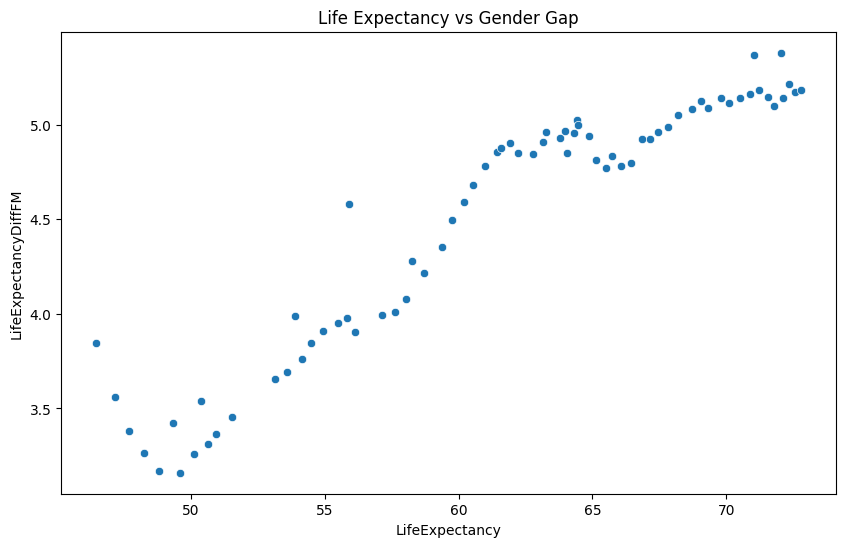

In [48]:
#merge the two datasets together
life_expectancy_merged=pd.merge(life_expectancy, life_expectancy_female_male, on=['Entity','Code','Year'])
#select rows containing world data
world_gap=life_expectancy_merged.set_index('Code')
world_gap=world_gap.loc['OWID_WRL']
#display the selected rows
display(life_expectancy_merged,world_gap)
#generate scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=world_gap,
    x='LifeExpectancy',
    y='LifeExpectancyDiffFM'
)
plt.title(f'Life Expectancy vs Gender Gap', fontsize=12)

plt.show()

LifeExpectancy                                               \
Year                     1950     1951     1952     1953     1954     1955   
Entity                                                                       
Afghanistan           27.7275  27.9634  28.4456  28.9304  29.2258  29.9206   
Albania               44.7355  45.1396  45.9788  46.5442  47.5946  48.5424   
Algeria               42.3596  42.4534  42.8974  42.9286  40.2048  40.3875   
American Samoa        60.9554  61.3618  61.6466  61.2695  62.1300  62.2637   
Andorra               64.5863  64.2338  67.4204  68.2467  69.4804  69.2563   
...                       ...      ...      ...      ...      ...      ...   
Western Sahara        34.8811  35.0759  35.4698  35.8594  36.2534  36.6489   
World                 46.4643  47.1440  48.2311  48.8024  49.5919  50.1229   
Yemen                 31.6624  31.6802  31.8022  31.9307  32.0423  32.1716   
Zambia                45.1225  45.2783  45.6798  46.1441  46.5333  46.9534   
Zimbabwe              49.6439  49.8599  50.2169  50.6165  51.0120  51.2746   

                                                    ...                    \
Year               1956     1957     1958     1959  ...     2012     2013   
Entity                                              ...                     
Afghanistan     30.4078  30.9458  31.5066  32.0386  ...  61.9230  62.4167   
Albania         49.5758  50.7065  51.9755  53.1985  ...  78.0640  78.1226   
Algeria         40.3448  40.3642  40.4426  40.5489  ...  74.2024  74.6153   
American Samoa  62.6438  62.8682  63.3267  63.6117  ...  72.3202  72.2683   
Andorra         69.3102  69.1260  71.3539  71.2312  ...  82.9166  82.9343   
...                 ...      ...      ...      ...  ...      ...      ...   
Western Sahara  37.0481  37.4417  37.8298  38.2122  ...  68.2703  68.6511   
World           50.6425  50.9448  51.5370  49.3453  ...  70.8725  71.2072   
Yemen           32.2743  32.3633  32.7898  33.1897  ...  67.3429  67.5451   
Zambia          47.3717  47.7504  48.2260  48.6542  ...  58.8672  59.8777   
Zimbabwe        51.6998  52.0579  52.4033  52.8408  ...  55.6263  57.4577   

                                                                               \
Year               2014     2015     2016     2017     2018     2019     2020   
Entity                                                                          
Afghanistan     62.5451  62.6587  63.1361  63.0160  63.0810  63.5645  62.5751   
Albania         78.4075  78.6441  78.8602  79.0473  79.1838  79.2825  76.9893   
Algeria         75.1100  75.6220  75.7318  75.7428  76.0656  76.4742  74.4528   
American Samoa  72.3403  72.5220  72.3712  72.4830  72.4915  72.3023  72.4432   
Andorra         82.9483  82.9534  82.9671  82.9803  82.9923  83.0039  79.0234   
...                 ...      ...      ...      ...      ...      ...      ...   
Western Sahara  68.9796  69.2957  69.5923  69.8544  70.0924  70.3129  70.5218   
World           71.5649  71.8004  72.1102  72.3267  72.5759  72.7897  72.0361   
Yemen           67.3842  65.8734  66.0641  65.9573  64.5751  65.0917  64.6501   
Zambia          60.6990  61.2078  61.7937  62.1201  62.3422  62.7926  62.3803   
Zimbabwe        58.8460  59.5911  60.3059  60.7095  61.4141  61.2925  61.1242   

                         
Year               2021  
Entity                   
Afghanistan     61.9824  
Albania         76.4626  
Algeria         76.3767  
American Samoa  72.5398  
Andorra         80.3684  
...                 ...  
Western Sahara  70.7804  
World           71.0479  
Yemen           63.7534  
Zambia          61.2234  
Zimbabwe        59.2531  

[237 rows x 72 columns]

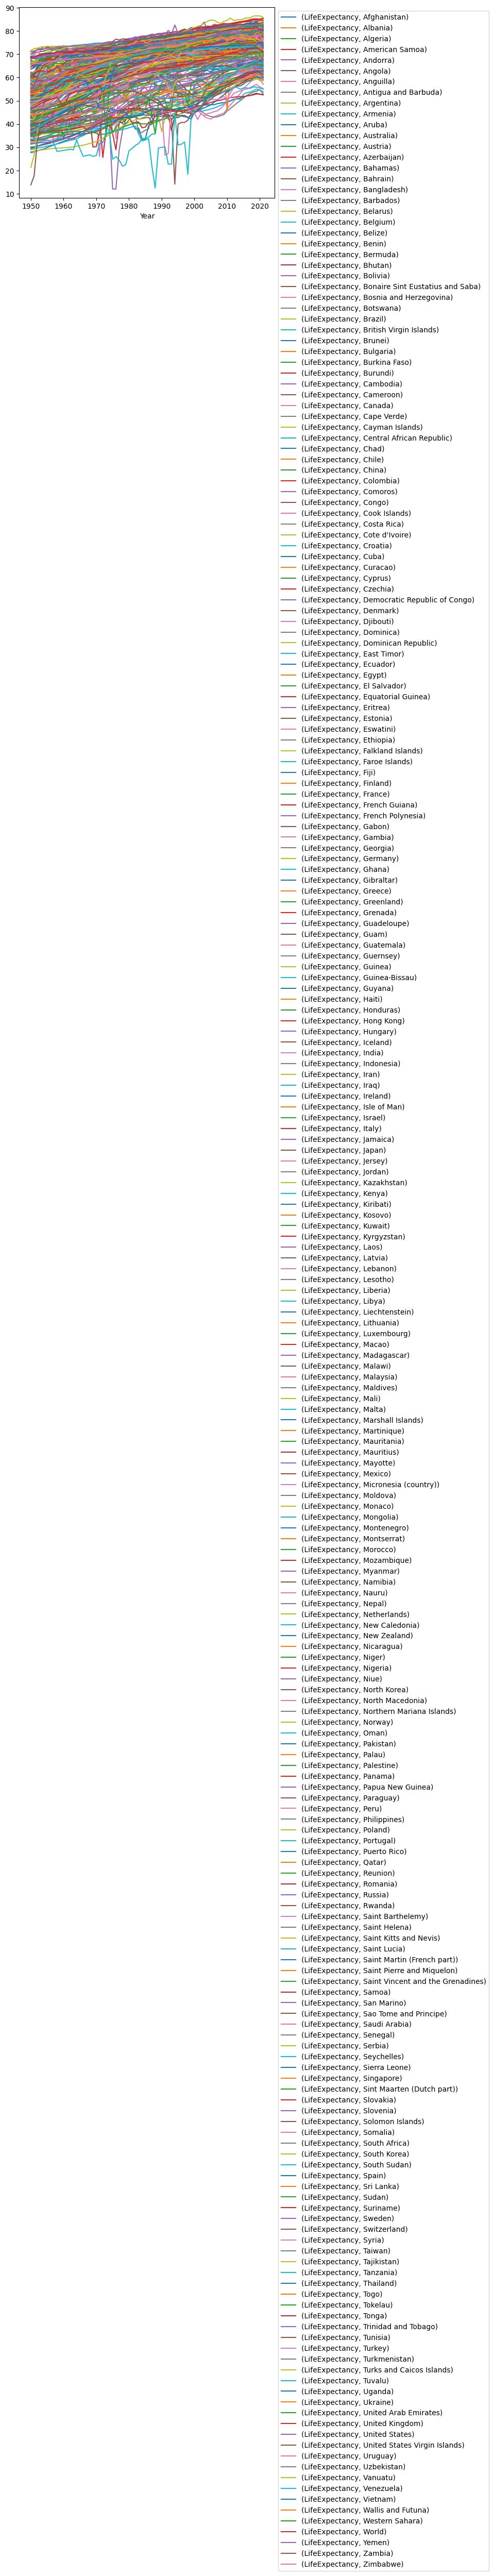

In [9]:
#selecting rows with country data and world data only
countries_le=life_expectancy[life_expectancy['Code'].notna()]
#selecting starting year from 1950
countries_le=countries_le[countries_le['Year']>=1950]
#set Entity and Year as index
countries_le_indexed=countries_le.set_index(['Entity','Year'])
#selecting LifeExpectancy column
countries_le_nocode=countries_le_indexed.iloc[:,-1:]
#converting to wide format
countries_le_wide=countries_le_nocode.unstack()
display(countries_le_wide)
#converting to wide format with level 0 of index
countries_le_wide=countries_le_indexed.unstack(level=0)
#Generate plot for each country against every year since 1950
fig=countries_le_wide.plot()
fig.legend(bbox_to_anchor=(1,1))

In [52]:
import plotly.express as px
#select rows excluding 'World'
countries_only_le=countries_le[countries_le['Entity']!='World']
#select year, this is done by making 'Year' as index first
countries_only_le=countries_only_le.set_index('Year')
#select year(s) of interest
countries_le_2021=countries_only_le.loc[2021]
countries_le_1950=countries_only_le.loc[1950]
#plot countries by country name (Entity) for 1950 and 2021
fig=px.choropleth(countries_le_1950,locations='Entity',locationmode='country names',color='LifeExpectancy')
fig.show()
fig=px.choropleth(countries_le_2021,locations='Entity',locationmode='country names',color='LifeExpectancy')
fig.show()


In [17]:
#determine the number of countries to be displayed
n=5
#select the top 5 countries in life expectancy in the year 1950
top_countries_le_1950=countries_le_1950.nlargest(n,'LifeExpectancy')
#select the bottom 5 countries in life expectancy in the year 1950
bottom_countries_le_1950=countries_le_1950.nsmallest(n,'LifeExpectancy')
#select the top 5 countries in life expectancy in the year 2021
top_countries_le_2021=countries_le_2021.nlargest(n,'LifeExpectancy')
#select the bottom 5 countries in life expectancy in the year 2021
bottom_countries_le_2021=countries_le_2021.nsmallest(n,'LifeExpectancy')

display(top_countries_le_1950,
        bottom_countries_le_1950,
        top_countries_le_2021,
        bottom_countries_le_2021)

,Entity,Code,LifeExpectancy
Year,,,
1950,Norway,NOR,71.5879
1950,Netherlands,NLD,71.4403
1950,Iceland,ISL,71.2223
1950,Sweden,SWE,71.1394
1950,Denmark,DNK,70.3084


,Entity,Code,LifeExpectancy
Year,,,
1950,North Korea,PRK,13.8211
1950,South Korea,KOR,21.3120
1950,Afghanistan,AFG,27.7275
1950,Mali,MLI,28.1697
1950,East Timor,TLS,29.0466


,Entity,Code,LifeExpectancy
Year,,,
2021,Monaco,MCO,85.9463
2021,Hong Kong,HKG,85.4734
2021,Macao,MAC,85.3994
2021,Japan,JPN,84.7839
2021,Australia,AUS,84.5265


,Entity,Code,LifeExpectancy
Year,,,
2021,Chad,TCD,52.5254
2021,Nigeria,NGA,52.6760
2021,Lesotho,LSO,53.0620
2021,Central African Republic,CAF,53.8947
2021,South Sudan,SSD,54.9752


In [20]:

#select rows excluding 'World' and continents
countries_le_age=life_expectancy_different_ages[life_expectancy_different_ages['Code'].notna()]
countries_le_age=countries_le_age[countries_le_age['Entity']!='World']
#select year, this is done by making 'Year' as index first
countries_le_age=countries_le_age.set_index('Year')
#select year(s) of interest
countries_le_age2021=countries_le_age.loc[2021]
countries_le_age1950=countries_le_age.loc[1950]
#determine the number of countries to be displayed
n=5
#select the top 5 countries in life expectancy between different age groups in the year 1950 and its columns
top_countries_le_age_1950=countries_le_age1950.nlargest(n,['LifeExpectancy0','LifeExpectancy10','LifeExpectancy25','LifeExpectancy45','LifeExpectancy65','LifeExpectancy80'])
#select the bottom 5 countries in life expectancy between different age groups in the year 1950 and its columns
bottom_countries_le_age_1950=countries_le_age1950.nsmallest(n,['LifeExpectancy0','LifeExpectancy10','LifeExpectancy25','LifeExpectancy45','LifeExpectancy65','LifeExpectancy80'])
#select the top 5 countries in life expectancy between different age groups in the year 1950 and its columns
top_countries_le_age_2021=countries_le_age2021.nlargest(n,['LifeExpectancy0','LifeExpectancy10','LifeExpectancy25','LifeExpectancy45','LifeExpectancy65','LifeExpectancy80'])
#select the bottom 5 countries in life expectancy between different age groups in the year 1950 and its columns
bottom_countries_le_age_2021=countries_le_age2021.nsmallest(n,['LifeExpectancy0','LifeExpectancy10','LifeExpectancy25','LifeExpectancy45','LifeExpectancy65','LifeExpectancy80'])
#display selected countries
display(top_countries_le_age_1950,
        bottom_countries_le_age_1950,
        top_countries_le_age_2021,
        bottom_countries_le_age_2021)


,Entity,Code,LifeExpectancy0,LifeExpectancy10,LifeExpectancy25,LifeExpectancy45,LifeExpectancy65,LifeExpectancy80
Year,,,,,,,,
1950,Norway,NOR,71.5879,74.344500,75.082596,76.4451,79.9505,86.2270
1950,Netherlands,NLD,71.4403,74.040100,74.624600,75.8348,79.3190,85.9043
1950,Iceland,ISL,71.2223,73.176300,74.224396,76.2077,80.2320,86.8783
1950,Sweden,SWE,71.1394,73.181305,73.835900,75.2037,78.9310,85.5964
1950,Denmark,DNK,70.3084,73.044600,73.612500,74.9694,78.8219,85.5579


,Entity,Code,LifeExpectancy0,LifeExpectancy10,LifeExpectancy25,LifeExpectancy45,LifeExpectancy65,LifeExpectancy80
Year,,,,,,,,
1950,North Korea,PRK,13.8211,28.0099,36.9266,54.7732,69.7639,82.1747
1950,South Korea,KOR,21.3120,34.7053,42.3220,59.4859,72.3331,82.8158
1950,Afghanistan,AFG,27.7275,49.1459,54.4422,63.4225,73.4901,83.7259
1950,Mali,MLI,28.1697,53.0983,58.1648,65.5981,73.4900,83.1691
1950,East Timor,TLS,29.0466,50.0164,55.1780,63.9989,73.7840,83.8684


,Entity,Code,LifeExpectancy0,LifeExpectancy10,LifeExpectancy25,LifeExpectancy45,LifeExpectancy65,LifeExpectancy80
Year,,,,,,,,
2021,Monaco,MCO,85.9463,86.3289,86.4258,86.651200,87.6888,90.9643
2021,Hong Kong,HKG,85.4734,85.6595,85.7236,86.014900,87.6237,91.4634
2021,Macao,MAC,85.3994,85.6994,85.8049,86.117294,87.5582,90.9318
2021,Japan,JPN,84.7839,85.0149,85.1800,85.654000,87.3664,90.8168
2021,Australia,AUS,84.5265,84.8378,84.9225,85.180900,86.6318,90.0189


,Entity,Code,LifeExpectancy0,LifeExpectancy10,LifeExpectancy25,LifeExpectancy45,LifeExpectancy65,LifeExpectancy80
Year,,,,,,,,
2021,Chad,TCD,52.5254,60.5135,63.748200,68.936005,75.861000,84.6128
2021,Nigeria,NGA,52.6760,61.0193,64.232895,69.360400,76.059900,84.6756
2021,Lesotho,LSO,53.0620,58.4771,60.188200,66.186900,75.992096,85.7968
2021,Central African Republic,CAF,53.8947,60.5441,62.595200,67.959300,76.224600,85.5170
2021,South Sudan,SSD,54.9752,62.5312,65.480700,70.234000,76.599800,84.9778


,Entity,Code,Age,LifeExpectancy
0,Monaco,MCO,LifeExpectancy0,85.946300
1,Monaco,MCO,LifeExpectancy10,86.328900
2,Monaco,MCO,LifeExpectancy25,86.425800
3,Monaco,MCO,LifeExpectancy45,86.651200
4,Monaco,MCO,LifeExpectancy65,87.688800
5,Monaco,MCO,LifeExpectancy80,90.964300
6,Hong Kong,HKG,LifeExpectancy0,85.473400
7,Hong Kong,HKG,LifeExpectancy10,85.659500
8,Hong Kong,HKG,LifeExpectancy25,85.723600
9,Hong Kong,HKG,LifeExpectancy45,86.014900


<function matplotlib.pyplot.show(close=None, block=None)>

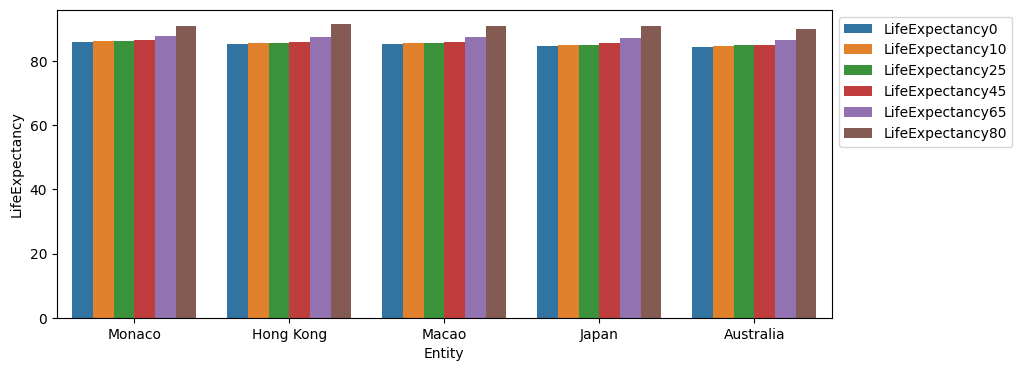

In [28]:
#making a new dataframe that pivots the columns into rows
group_countries_age=top_countries_le_age_2021.set_index(['Entity','Code']).rename_axis(columns='Age').stack().reset_index(name='LifeExpectancy')
display(group_countries_age)
#generate bar chart of selected countries
plt.figure(figsize=(10,4))
sns.barplot(
    data=group_countries_age,
    x='Entity',
    y='LifeExpectancy',
    hue='Age'
)
plt.legend(bbox_to_anchor=(1,1))
plt.show

,Entity,Code,Year,LifeExpectancy
2571,Brunei,BRN,1950,50.0215
2572,Brunei,BRN,1951,50.9983
2573,Brunei,BRN,1952,51.8407
2574,Brunei,BRN,1953,52.5081
2575,Brunei,BRN,1954,53.0509
...,...,...,...,...
20311,Vietnam,VNM,2017,73.9632
20312,Vietnam,VNM,2018,73.9757
20313,Vietnam,VNM,2019,74.0929
20314,Vietnam,VNM,2020,75.3779


LifeExpectancy                                               \
Year                 1950     1951     1952     1953     1954     1955   
Entity                                                                   
Brunei            50.0215  50.9983  51.8407  52.5081  53.0509  53.4835   
Cambodia          38.9368  39.2463  39.5109  39.7438  40.2200  40.4489   
East Timor        29.0466  29.2985  29.6238  29.8918  30.1982  30.5185   
Indonesia         39.4044  39.7847  40.6914  41.4147  42.1883  42.9213   
Laos              38.6957  38.7391  39.0487  39.3783  39.6739  39.9613   
Malaysia          46.9976  47.8482  48.8853  49.9488  50.8523  51.8195   
Myanmar           35.4352  36.0172  37.4675  38.4971  39.6333  40.5100   
Singapore         50.7019  52.0589  53.5786  55.1816  57.2473  59.2913   
Thailand          43.1669  43.9803  44.7518  45.3855  46.2603  47.0670   
Vietnam           49.2069  49.7738  50.4851  51.1128  53.3302  56.2662   

                                                ...                    \
Year           1956     1957     1958     1959  ...     2012     2013   
Entity                                          ...                     
Brunei      53.8891  54.3737  55.0322  55.8328  ...  74.8274  74.7992   
Cambodia    40.7700  41.1938  41.5156  41.7864  ...  68.9149  69.3042   
East Timor  30.8284  31.1153  31.3980  31.6984  ...  66.0812  66.4396   
Indonesia   43.7964  44.4986  45.0457  45.8581  ...  68.9730  69.2641   
Laos        40.2923  40.5287  40.8401  40.4489  ...  65.3554  65.7182   
Malaysia    52.6915  53.6108  54.5602  55.5903  ...  74.9440  75.0348   
Myanmar     41.3671  42.0326  42.7659  43.3291  ...  64.1412  64.8148   
Singapore   60.6735  61.8001  62.5945  63.8721  ...  82.2434  82.5157   
Thailand    47.7805  48.4790  49.0183  49.7348  ...  76.7721  77.0827   
Vietnam     57.0860  57.5886  58.3565  58.9832  ...  73.7044  73.7755   

                                                                           \
Year           2014     2015     2016     2017     2018     2019     2020   
Entity                                                                      
Brunei      74.7788  74.7498  74.7332  74.7220  74.7118  74.7483  74.7949   
Cambodia    69.7364  69.8725  70.2244  70.5153  70.5609  70.6923  70.4160   
East Timor  66.7865  67.1373  67.4461  67.7454  68.0167  68.2684  68.4755   
Indonesia   69.5333  69.6989  69.7976  69.9356  70.3375  70.5184  68.8077   
Laos        66.3605  66.6700  67.1667  67.4344  67.6341  68.1382  68.4968   
Malaysia    75.1459  75.0942  75.2888  75.4763  75.6444  75.7603  75.9378   
Myanmar     65.0563  65.5613  65.6850  65.8430  66.4646  66.6104  66.7970   
Singapore   82.6524  82.8265  83.0001  83.2236  83.4576  83.7584  82.8610   
Thailand    77.4153  77.7166  78.0489  78.3939  78.6622  78.9751  79.2739   
Vietnam     73.8545  73.8763  73.9382  73.9632  73.9757  74.0929  75.3779   

                     
Year           2021  
Entity               
Brunei      74.6424  
Cambodia    69.5835  
East Timor  67.7369  
Indonesia   67.5703  
Laos        68.0608  
Malaysia    74.8839  
Myanmar     65.6716  
Singapore   82.7545  
Thailand    78.7154  
Vietnam     73.6181  

[10 rows x 72 columns]

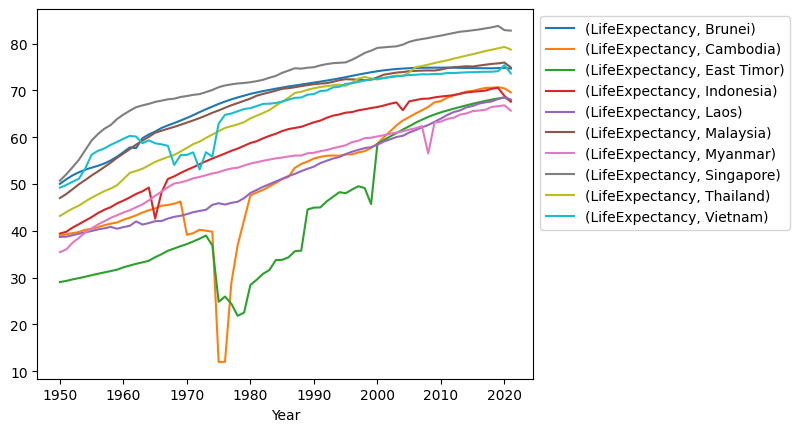

In [11]:
#Making a line graph of life expectancies of South East Asian (SEA) Countries from 1950 to 2021
#Selecting SEA country codes
sea_country_codes=['IDN','TLS','BRN','MYS','SGP','THA','MMR','KHM','VNM','LAO']
#Selecting rows with SEA country codes
countries_sea_le=countries_le[countries_le['Code'].isin(sea_country_codes)]
#Set Entity and YEar as indices
sea_le_indexed=countries_sea_le.set_index(['Entity','Year'])
#select LifeExpectancy column
sea_le_nocode=sea_le_indexed.iloc[:,-1:]
#convert to wide format
sea_le_wide=sea_le_nocode.unstack()
display(countries_sea_le)
display(sea_le_wide)
#using level 0 of the index
sea_le_wide=sea_le_nocode.unstack(level=0)
#generate line plot for each country against year
fig=sea_le_wide.plot()
fig.legend(bbox_to_anchor=(1,1))



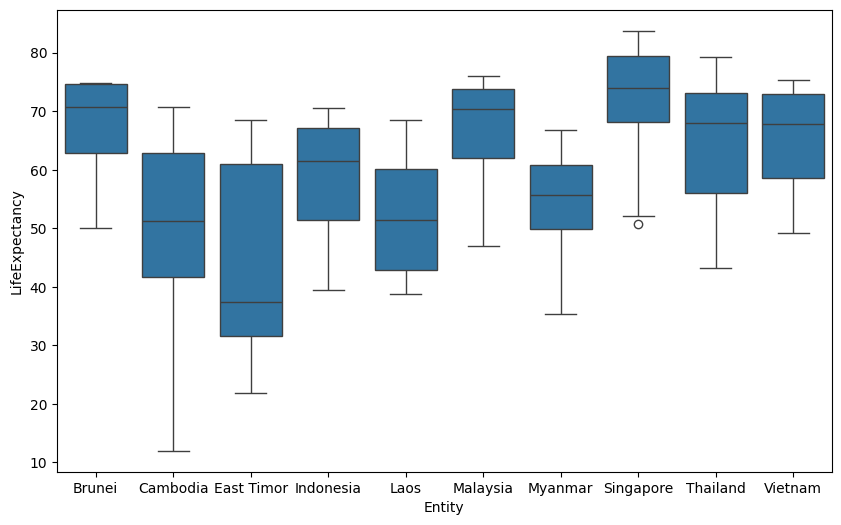

,LifeExpectancy
count,720.000000
mean,59.951344
std,13.223259
min,11.995100
25%,51.039125
50%,62.341250
75%,70.566200
max,83.758400


In [42]:
#imoprt seaborn
import seaborn as sns
#import matplotlib
import matplotlib.pyplot as plt
#generate box plots
plt.figure(figsize=(10,6))
sns.boxplot(data=countries_sea_le, x='Entity',y='LifeExpectancy')

plt.show()
display(countries_sea_le.drop(columns=['Year']).describe())


,Entity,Code,Year,LifeExpectancy0,LifeExpectancy10,LifeExpectancy25,LifeExpectancy45,LifeExpectancy65,LifeExpectancy80
2571,Brunei,BRN,1950,50.0215,63.6196,66.384300,70.658100,76.7295,85.048996
2572,Brunei,BRN,1951,50.9983,63.6704,66.378900,70.615295,76.7089,85.045500
2573,Brunei,BRN,1952,51.8407,63.7320,66.393295,70.589800,76.6976,85.046000
2574,Brunei,BRN,1953,52.5081,63.7960,66.416595,70.573400,76.6886,85.046200
2575,Brunei,BRN,1954,53.0509,63.8820,66.464500,70.577500,76.6891,85.050200
...,...,...,...,...,...,...,...,...,...
20311,Vietnam,VNM,2017,73.9632,75.8905,76.901596,78.741000,82.1077,87.852700
20312,Vietnam,VNM,2018,73.9757,75.8899,76.903595,78.744900,82.1136,87.861900
20313,Vietnam,VNM,2019,74.0929,75.9909,76.993400,78.814606,82.1635,87.895000
20314,Vietnam,VNM,2020,75.3779,77.2862,78.200500,79.837100,82.8512,88.345300


,Entity,Code,LifeExpectancy0,LifeExpectancy10,LifeExpectancy25,LifeExpectancy45,LifeExpectancy65,LifeExpectancy80
Year,,,,,,,,
1975,Brunei,BRN,67.1071,69.5677,70.745804,73.028200,78.1025,85.7440
1975,Cambodia,KHM,11.9951,26.3521,35.774800,53.627700,69.0995,82.1042
1975,East Timor,TLS,24.8337,41.7808,48.841900,61.749100,73.1652,83.8739
1975,Indonesia,IDN,55.9683,65.9005,67.937100,71.309296,76.9793,85.1474
1975,Laos,LAO,45.8916,60.2726,63.469900,68.983000,76.2042,84.8849
1975,Malaysia,MYS,65.7118,68.9153,70.023300,72.028300,77.3881,85.7185
1975,Myanmar,MMR,52.5155,63.0899,65.670200,70.284600,76.8343,85.1257
1975,Singapore,SGP,70.6697,72.0196,72.616196,73.931200,78.5287,86.1424
1975,Thailand,THA,61.2719,67.0477,69.138596,73.007800,79.4726,87.9993


,Entity,Code,Age,LifeExpectancy
0,Brunei,BRN,LifeExpectancy0,67.107100
1,Brunei,BRN,LifeExpectancy10,69.567700
2,Brunei,BRN,LifeExpectancy25,70.745804
3,Brunei,BRN,LifeExpectancy45,73.028200
4,Brunei,BRN,LifeExpectancy65,78.102500
5,Brunei,BRN,LifeExpectancy80,85.744000
6,Cambodia,KHM,LifeExpectancy0,11.995100
7,Cambodia,KHM,LifeExpectancy10,26.352100
8,Cambodia,KHM,LifeExpectancy25,35.774800
9,Cambodia,KHM,LifeExpectancy45,53.627700


<function matplotlib.pyplot.show(close=None, block=None)>

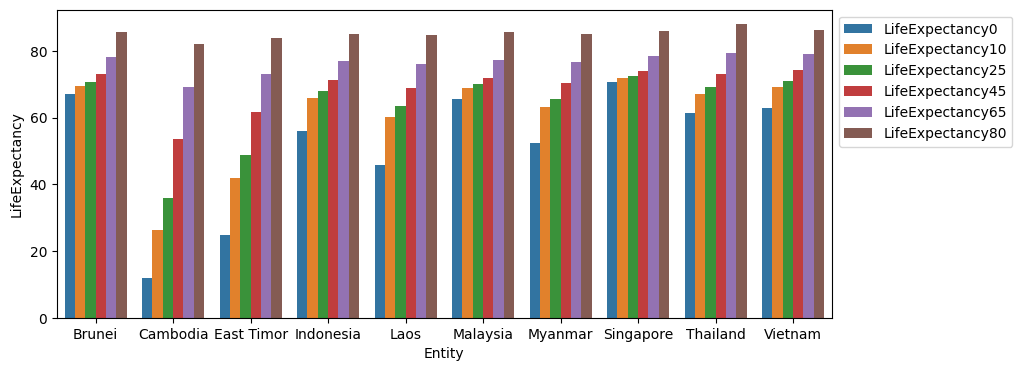

In [37]:
#Selecting rows with SEA country codes
countries_sea_le_ages=life_expectancy_different_ages[life_expectancy_different_ages['Code'].isin(sea_country_codes)]
#set the index of the dataframe to Year
countries_sea_le_ages_indexed=countries_sea_le_ages.set_index('Year')
#select the year 1975
countries_sea_le_ages_1975=countries_sea_le_ages_indexed.loc[1975]
#display selected rows
display(countries_sea_le_ages,countries_sea_le_ages_1975)
#create a new dataframe that transforms the columns of the previous one into rows
group_countries_sea_age=countries_sea_le_ages_1975.set_index(['Entity','Code']).rename_axis(columns='Age').stack().reset_index(name='LifeExpectancy')
display(group_countries_sea_age)
#generate bar chart of the selected dataframe
plt.figure(figsize=(10,4))
sns.barplot(
    data=group_countries_sea_age,
    x='Entity',
    y='LifeExpectancy',
    hue='Age'
)
plt.legend(bbox_to_anchor=(1,1))
plt.show

In [ ]:
for key,frame in countries_le.groupby('Entity'):
  frame.plot(x='Year',y='LifeExpectancy', title=key)

Output hidden; open in https://colab.research.google.com to view.